# Bode Plots

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Low Pass Filter

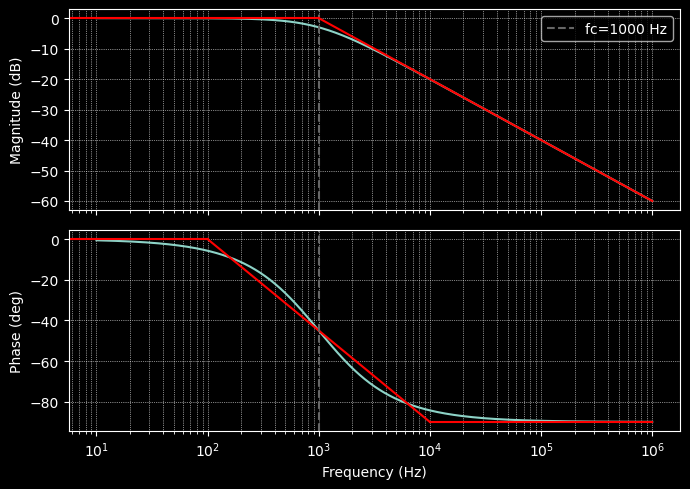

In [17]:
# RC low-pass parameters (fc = 1 kHz)
R = 1e3
C = 159.155e-9  # ~1/(2*pi*R*1000) so fc ≈ 1 kHz
fc = 1/(2*np.pi*R*C)

# frequency vector (log spaced)
f = np.logspace(1, 6, 1000)  # 10 Hz to 1 MHz

# transfer H(jw) = 1 / (1 + j*w*R*C)
w = 2*np.pi*f
H = 1 / (1 + 1j * w * R * C)

mag_db = 20 * np.log10(np.abs(H))
phase_deg = np.angle(H, deg=True)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7,5), sharex=True)
ax1.semilogx(f, mag_db)
ax1.set_ylabel('Magnitude (dB)')
ax1.grid(True, which='both', ls=':', lw=0.5)
ax1.axvline(fc, color='0.4', ls='--', label=f'fc={fc:.0f} Hz')
ax1.plot([0, fc], [0, 0], color='red')
ax1.plot([fc, f[-1]], [0, -60], color='red')
ax1.legend()

ax2.semilogx(f, phase_deg)
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Phase (deg)')
ax2.grid(True, which='both', ls=':', lw=0.5)
ax2.plot([0, fc/10], [0, 0], color='red')
ax2.plot([fc/10, fc*10], [0, -90], color='red')
ax2.plot([fc*10, f[-1]], [-90, -90], color='red')
ax2.axvline(fc, color='0.4', ls='--')

plt.tight_layout()
plt.savefig('../slides/images/bode_plot_rc_lowpass.png', dpi=300)
plt.show()